<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/DPhi_NLP_Bootcamp_Graded_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement : Sarcasm Prediction

## Problem Overview
In this challenge, you will work on a dataset that contains news headlines - which are aimed to be written in a sarcastic manner by the news author. Our job here is to build our NLP models and predict whether the headline is sarcastic or not.

#### About the Data
Each record of dataset consists of two attributes:

- headline: this is the headline of the news article
- target variable 
    * is_sarcastic: 1
    * not_sarcastic : 0. 



In [ ]:
from google.colab import files
files.upload()

Saving Sample_Submission (5).csv to Sample_Submission (5).csv
Saving Test_Data (3).csv to Test_Data (3).csv
Saving Train_Data (4).csv to Train_Data (4).csv


{'Sample_Submission (5).csv': b'prediction\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\n1\r\

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import shutil
shutil.copy("/content/Train_Data (4).csv","/content/drive/MyDrive/dphi/Sarcasm")

'/content/drive/MyDrive/dphi/Sarcasm/Train_Data (4).csv'

In [ ]:
shutil.copy("/content/Test_Data (3).csv","/content/drive/MyDrive/dphi/Sarcasm")

'/content/drive/MyDrive/dphi/Sarcasm/Test_Data (3).csv'

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
from sklearn.metrics import confusion_matrix, classification_report
#


In [3]:
train = pd.read_csv("/content/drive/MyDrive/dphi/Sarcasm/Train_Data (4).csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/Sarcasm/Test_Data (3).csv")

In [4]:
train.head()

headline  is_sarcastic
0  supreme court votes 7-2 to legalize all worldl...             1
1  hungover man horrified to learn he made dozens...             1
2  emily's list founder: women are the 'problem s...             0
3      send your kids back to school with confidence             0
4          watch: experts talk pesticides and health             0

In [5]:
test.head()

headline
0  area stand-up comedian questions the deal with...
1  dozens of glowing exit signs mercilessly taunt...
2  perfect response to heckler somewhere in prop ...
3                       gop prays for ossoff lossoff
4  trevor noah says the scary truth about trump's...

## Install nltk libraries




In [6]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 321 kB 4.2 MB/s 
     |████████████████████████████████| 284 kB 72.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85446 sha256=9c54b8b866127b1f452f56ad61d1904e2de5eaf9946ef4e687ed37f5e7ea519a
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
import nltk
import contractions
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = WordNetLemmatizer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([lemmatizer.lemmatize(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [8]:
train['Clean Review'] = stp(train['headline'].values)
test['Clean Review'] = stp(test['headline'].values)

train.head()

headline  ...                                       Clean Review
0  supreme court votes 7-2 to legalize all worldl...  ...           supreme court vote legalize worldly vice
1  hungover man horrified to learn he made dozens...  ...  hungover man horrified learn made dozen plan l...
2  emily's list founder: women are the 'problem s...  ...   emily list founder woman problem solver congress
3      send your kids back to school with confidence  ...                    send kid back school confidence
4          watch: experts talk pesticides and health  ...                 watch expert talk pesticide health

[5 rows x 3 columns]

In [9]:
train = train[['Clean Review','is_sarcastic']]
test = test[['Clean Review']]
train.head()

Clean Review  is_sarcastic
0           supreme court vote legalize worldly vice             1
1  hungover man horrified learn made dozen plan l...             1
2   emily list founder woman problem solver congress             0
3                    send kid back school confidence             0
4                 watch expert talk pesticide health             0

## Detect Polarity and Sujectivity

In [ ]:
train['Clean Review'].apply(lambda row: textblob.TextBlob(row).sentiment)

0                        (0.0, 0.0)
1        (0.0, 0.06666666666666667)
2                        (0.0, 0.0)
3                        (0.0, 0.0)
4                        (0.0, 0.0)
                    ...            
44257                    (0.0, 0.0)
44258                    (0.0, 0.0)
44259                    (0.0, 0.0)
44260                    (0.0, 0.0)
44261                  (-0.05, 0.1)
Name: Clean Review, Length: 44262, dtype: object

In [10]:
import textblob

In [11]:
x_train_snt_obj  = train['Clean Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = test['Clean Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [12]:
train.head()

Clean Review  ...  Subjectivity
0           supreme court vote legalize worldly vice  ...      0.000000
1  hungover man horrified learn made dozen plan l...  ...      0.066667
2   emily list founder woman problem solver congress  ...      0.000000
3                    send kid back school confidence  ...      0.000000
4                 watch expert talk pesticide health  ...      0.000000

[5 rows x 4 columns]

In [13]:
test.head()

Clean Review  Polarity  Subjectivity
0  area stand comedian question deal drive thru w...       0.0           0.0
1  dozen glowing exit sign mercilessly taunt mult...      -0.7           1.0
2  perfect response heckler somewhere prop comedi...       1.0           1.0
3                           gop prays ossoff lossoff       0.0           0.0
4  trevor noah say scary truth trump rumored love...       0.0           0.8

## Test Train Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[['Clean Review','Polarity','Subjectivity']], train['is_sarcastic'],stratify=train['is_sarcastic'],random_state=42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((33196, 3), (11066, 3), (33196,), (11066,))

In [15]:
X_train.head()

Clean Review  ...  Subjectivity
8119   world hunger new frito lay zestitos solve problem  ...      0.454545
37076                         gorsuch rbg new odd couple  ...      0.352273
20475  artificial intelligence help u microsoft bos j...  ...      1.000000
39051                 state enacted abortion restriction  ...      0.000000
12111  trump hotel buck industry trend continue offer...  ...      0.000000

[5 rows x 3 columns]

In [16]:
X_train_metadata = X_train[['Polarity','Subjectivity']]
X_test_metadata = X_test[['Polarity','Subjectivity']]
#
test_metadata = test[['Polarity','Subjectivity']]

In [26]:
X_train_metadata.shape,X_test_metadata.shape

((33196, 2), (11066, 2))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

cv = TfidfVectorizer(lowercase=True, 
                     max_df=1.0,
                     use_idf=True,
                     ngram_range=(1, 1),
                     max_features=1000)
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
#
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

abortion  abuse  accidentally  according  ...  yet  york  young  youth
0  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
1  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
2  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
3  0.793412    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
4  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1000 columns]

In [18]:
testcv = cv.transform(test['Clean Review']).toarray()
testcv = pd.DataFrame(testcv, columns=cv.get_feature_names())
testcv.head()

abortion  abuse  accidentally  according  ...  yet  york  young  youth
0       0.0    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
1       0.0    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
2       0.0    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
3       0.0    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
4       0.0    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1000 columns]

In [32]:
X_train_metadata.shape, X_traincv.shape

((33196, 2), (33196, 1000))

In [51]:
X_train_metadata = X_train_metadata.reset_index(drop=True).drop('index',axis=1)
X_train_metadata.head()

Polarity  Subjectivity
0  0.136364      0.454545
1 -0.015152      0.352273
2 -0.600000      1.000000
3  0.000000      0.000000
4  0.000000      0.000000

In [52]:
X_traincv.head()

abortion  abuse  accidentally  according  ...  yet  york  young  youth
0  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
1  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
2  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
3  0.793412    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
4  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1000 columns]

In [53]:
pd.concat([X_train_metadata,X_traincv],axis=1).reset_index(drop=True).shape

(33196, 1002)

In [56]:
X_test_metadata = X_test_metadata.reset_index(drop=True)
X_test_metadata.head()

Polarity  Subjectivity
0       0.8           1.0
1       0.0           0.0
2       0.0           0.0
3       0.0           0.0
4       0.0           0.0

In [57]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)
#
X_train_comb.head()

Polarity  Subjectivity  abortion  abuse  ...  yet  york  young  youth
0  0.136364      0.454545  0.000000    0.0  ...  0.0   0.0    0.0    0.0
1 -0.015152      0.352273  0.000000    0.0  ...  0.0   0.0    0.0    0.0
2 -0.600000      1.000000  0.000000    0.0  ...  0.0   0.0    0.0    0.0
3  0.000000      0.000000  0.793412    0.0  ...  0.0   0.0    0.0    0.0
4  0.000000      0.000000  0.000000    0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1002 columns]

In [58]:
X_traincv.shape,X_testcv.shape,X_train_comb.shape

((33196, 1000), (11066, 1000), (33196, 1002))

In [59]:
test_combo = pd.concat([test_metadata, testcv], axis=1)
#
test_combo.head()

Polarity  Subjectivity  abortion  abuse  ...  yet  york  young  youth
0       0.0           0.0       0.0    0.0  ...  0.0   0.0    0.0    0.0
1      -0.7           1.0       0.0    0.0  ...  0.0   0.0    0.0    0.0
2       1.0           1.0       0.0    0.0  ...  0.0   0.0    0.0    0.0
3       0.0           0.0       0.0    0.0  ...  0.0   0.0    0.0    0.0
4       0.0           0.8       0.0    0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1002 columns]

In [60]:
test_metadata.shape, testcv.shape,test_combo.shape

((11066, 2), (11066, 1000), (11066, 1002))

In [61]:
X_traincv.head()

abortion  abuse  accidentally  according  ...  yet  york  young  youth
0  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
1  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
2  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
3  0.793412    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0
4  0.000000    0.0           0.0        0.0  ...  0.0   0.0    0.0    0.0

[5 rows x 1000 columns]

In [62]:
X_train_comb.shape,y_train.shape

((33196, 1002), (33196,))

## Build Model

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

## Model Training and Evaluation


In [66]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      5990
           1       0.76      0.69      0.72      5076

    accuracy                           0.75     11066
   macro avg       0.75      0.75      0.75     11066
weighted avg       0.75      0.75      0.75     11066



0     1
0  4867  1123
1  1596  3480

## Confusion Matrix

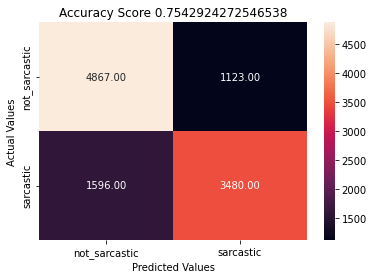

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test,predictions)
cf = confusion_matrix(y_test,predictions)
sns.heatmap(cf,annot=True,fmt='.2f',xticklabels=['not_sarcastic','sarcastic'],yticklabels=['not_sarcastic','sarcastic'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Accuracy Score {accuracy}')
plt.show()

## Make Predictions on the 

In [71]:
preds = lr.predict(test_combo)

In [72]:
test['prediction'] = preds
test.head()

Clean Review  ...  prediction
0  area stand comedian question deal drive thru w...  ...           1
1  dozen glowing exit sign mercilessly taunt mult...  ...           1
2  perfect response heckler somewhere prop comedi...  ...           0
3                           gop prays ossoff lossoff  ...           0
4  trevor noah say scary truth trump rumored love...  ...           0

[5 rows x 4 columns]

In [73]:
test[['prediction']].to_csv('sarcassm_lr.csv',index=False)

## Accurcay Score on final submission

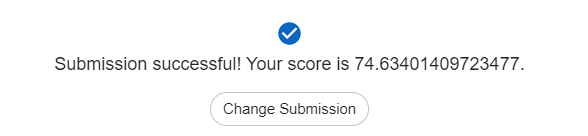